In [1]:
import numpy as np
import pandas as pd

import edhec_risk_kit_206 as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":"2018"]
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":"2018"]

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


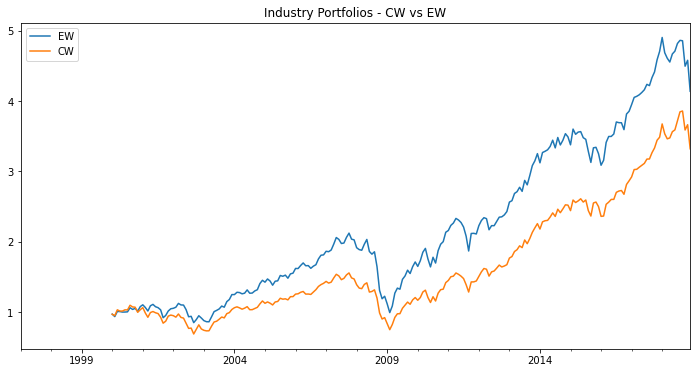

In [3]:
ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
erk.summary_stats(btr.dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
TEW,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413


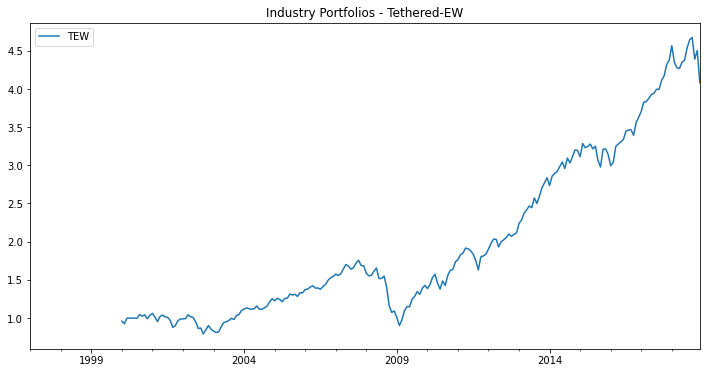

In [4]:
tewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew, cap_weights=ind_mcap, max_cw_mult=2.0, microcap_threshold=0.01)
dtewr = pd.DataFrame({"TEW": tewr})
(1+dtewr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - Tethered-EW")
erk.summary_stats(dtewr.dropna())

In [9]:
erk.tracking_error(ewr, cwr),erk.tracking_error(tewr, cwr)

(0.18752094143646486, 0.11671015519949166)

## Question 9 -12

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-Sample,0.066305,0.11741,-0.741086,4.469204,0.055456,0.080583,0.300812,-0.421289


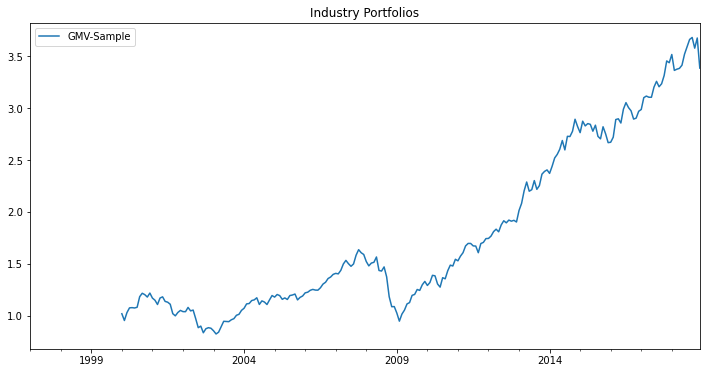

In [6]:
mv_s_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)
btr = pd.DataFrame({"GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-SC,0.068467,0.114572,-0.731286,4.264934,0.053884,0.077715,0.326638,-0.39341


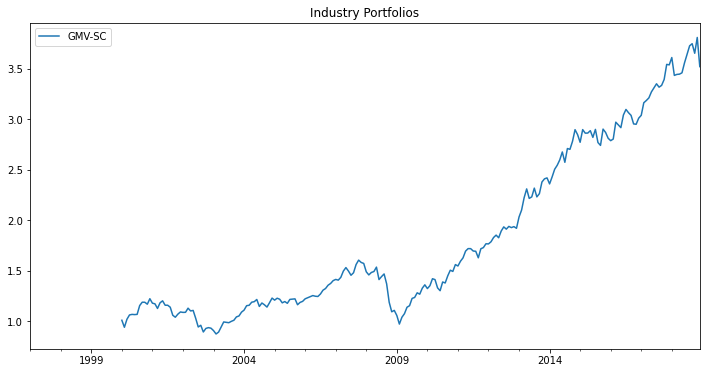

In [7]:
mv_sc_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"GMV-SC": mv_sc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())